# Проект: Линейные модели в машинном обучении

**Цель проекта:** разработать модели машинного обучения, которая поможет фермеру управлять рисками и принимать объективное решение о покупке новых коров для своего стада:

*    Первая будет прогнозировать возможный удой коровы (целевой признак `Удой`);
*    Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак `Вкус молока`).

С помощью моделей нужно отобрать коров по двум критериям:

*    средний удой за год — не менее 6000 килограммов;
*    молоко должно быть вкусным.

## Загрузка данных

In [1]:
# код ревьюера
!pip install --upgrade scikit-learn

     |████████████████████████████████| 10.9 MB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 302 kB 74.7 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [2]:
import math
import decimal
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import precision_recall_curve
from sklearn import svm

import statsmodels.stats.outliers_influence as influence
from statsmodels.tools.tools import add_constant  
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [3]:
df1 = pd.read_csv('/datasets/ferma_main.csv', sep=';', decimal=',')
df2 = pd.read_csv('/datasets/ferma_dad.csv', sep=';', decimal=',')
df3 = pd.read_csv('/datasets/cow_buy.csv', sep=';', decimal=',')

display(df1)
display(df1.info())
display(df2)
display(df2.info())
display(df3)
display(df3.info())

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
629,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
630,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
631,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
632,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

None

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
...,...,...
624,625,Буйный
625,626,Барин
626,627,Барин
627,628,Барин


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


None

##  Предобработка данных

Рассмотрим первый датафрейм `df1`: 

* переименуем столбцы в корректную форму;
* проверим данные на наличие полных дубликатов, удалим их;
* пропуски в данных отсутствуют;
* исправим неявные дубликаты в столбце `pasture_type`.



In [4]:
df1.rename(columns={'Удой, кг': 'milk_kg', 'ЭКЕ (Энергетическая кормовая единица)': 'efu', \
                   'Сырой протеин, г': 'protein_g', 'СПО (Сахаро-протеиновое соотношение)': 'sp_ratio', \
                   'Порода': 'breed', 'Тип пастбища': 'pasture_type', 'порода папы_быка': 'daddy_breed', \
                   'Жирность,%': 'fats_%', 'Белок,%': 'proteins_%', 'Вкус молока': 'taste_milk', \
                   'Возраст': 'age'}, inplace=True)

#удаляем дубликаты
print('Количество дубликатов:', df1.duplicated().sum())
df1.drop_duplicates(inplace=True)

#функция перевода в формат 'float', исправления неявных дубликатов 'pasture_type'
def change_symbol(row):
    if row['pasture_type'] == 'Равнинные':
        row['pasture_type'] = row['pasture_type'].replace('Равнинные', 'Равнинное')
    if row['daddy_breed'] == 'Айдиалл':
        row['daddy_breed'] = row['daddy_breed'].replace('Айдиалл', 'Айдиал')
    return row

df1 = df1.apply(change_symbol, axis=1)


display(df1)
display(df1.info())

Количество дубликатов: 5


,id,milk_kg,efu,protein_g,sp_ratio,breed,pasture_type,daddy_breed,fats_%,proteins_%,taste_milk,age
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,6812,15.4,1964,0.940,РефлешнСоверинг,Равнинное,Айдиал,3.74,3.075,не вкусно,более_2_лет
625,626,5513,12.9,1700,0.880,РефлешнСоверинг,Равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет
626,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
627,628,5746,13.8,1994,0.890,РефлешнСоверинг,Равнинное,Соверин,3.64,3.077,вкусно,более_2_лет


<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            629 non-null    int64  
 1   milk_kg       629 non-null    int64  
 2   efu           629 non-null    float64
 3   protein_g     629 non-null    int64  
 4   sp_ratio      629 non-null    float64
 5   breed         629 non-null    object 
 6   pasture_type  629 non-null    object 
 7   daddy_breed   629 non-null    object 
 8   fats_%        629 non-null    float64
 9   proteins_%    629 non-null    float64
 10  taste_milk    629 non-null    object 
 11  age           629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.9+ KB


None

Первый датафрейм готов к дальнейшей работе.

---

Рассмотрим второй датафрейм `df2`: 

* переименуем столбец `Имя Папы` в корректную форму;
* полные, неявные дубликаты, пропуски в данных отсутствуют.

In [5]:
df2.rename(columns={'Имя Папы': 'daddy_name'}, inplace=True)

print('Количество дубликатов:', df2.duplicated().sum())

display(df2)
display(df2.info())

Количество дубликатов: 0


,id,daddy_name
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
...,...,...
624,625,Буйный
625,626,Барин
626,627,Барин
627,628,Барин


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          629 non-null    int64 
 1   daddy_name  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

Второй датафрейм готов к дальнейшей работе.

---

Рассмотрим третий датафрейм `df3`: 

* переименуем столбцы в корректную форму;
* проверим данные на наличие полных дубликатов, удалим их;
* пропуски в данных отсутствуют;
* изменим тип данных там, где это необходимо;
* исправим неявные дубликаты в столбце `pasture_type`.

In [6]:
df3.rename(columns={'Порода': 'breed', 'Тип пастбища': 'pasture_type', 'порода папы_быка': 'daddy_breed', \
                   'Имя_папы': 'daddy_name', 'Текущая_жирность,%': 'fats_%', \
                   'Текущий_уровень_белок,%': 'proteins_%', 'Возраст': 'age'}, inplace=True)

df3 = df3.apply(change_symbol, axis=1)

print('Количество дубликатов:', df3.duplicated().sum())
df3.drop_duplicates(inplace=True, ignore_index=True)

display(df3)
display(df3.info())

Количество дубликатов: 4


,breed,pasture_type,daddy_breed,daddy_name,fats_%,proteins_%,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
7,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет
8,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет
9,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   breed         16 non-null     object 
 1   pasture_type  16 non-null     object 
 2   daddy_breed   16 non-null     object 
 3   daddy_name    16 non-null     object 
 4   fats_%        16 non-null     float64
 5   proteins_%    16 non-null     float64
 6   age           16 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.0+ KB


None

Третий датафрейм готов к дальнейшей работе.

---


### Промежуточный вывод:

Проверены все три датафрейма:

* переименованы столбцы в корректную форму;
* данные проверены на наличие полных дубликатов и очищены от них;
* пропуски в данных отсутствуют;
* тип данных изменён там, где это необходимо;
* исправлены неявные дубликаты.

---

## Исследовательский анализ данных

Анализ данных начнём с изучения параметров первого датафрейма. Необходимо проверить данные на наличие аномалий и выбросов. Построим гистограммы распределения количественных признаков, а также круговые диаграммы категориальных признаков.

### Первый датафрейм:

,milk_kg
count,629.00
mean,6188.75
median,6133.00
max,45616.00
min,5204.00


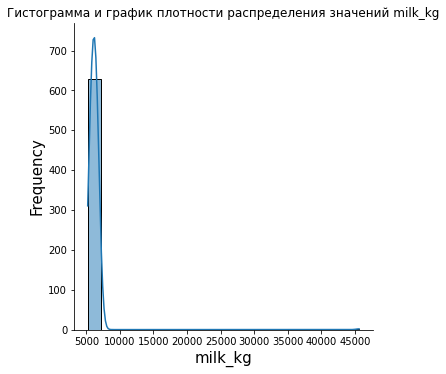

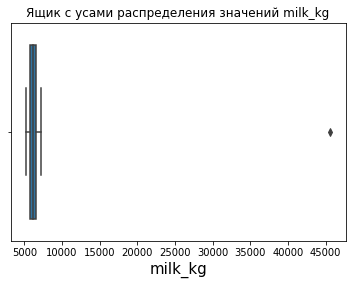

,efu
count,629.00
mean,14.54
median,14.70
max,16.80
min,10.90


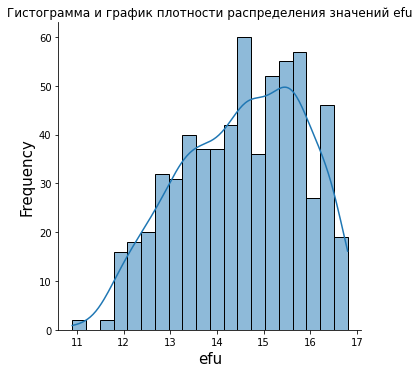

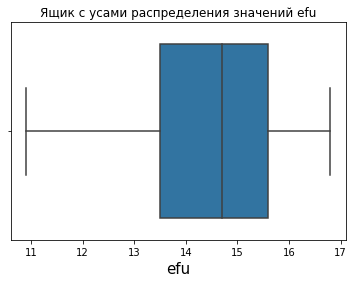

,protein_g
count,629.00
mean,1923.36
median,1888.00
max,2349.00
min,1660.00


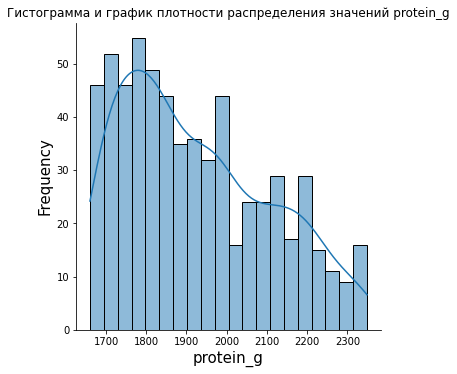

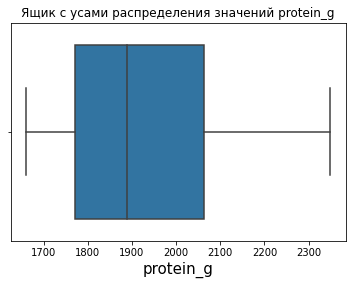

,sp_ratio
count,629.00
mean,0.91
median,0.93
max,0.96
min,0.84


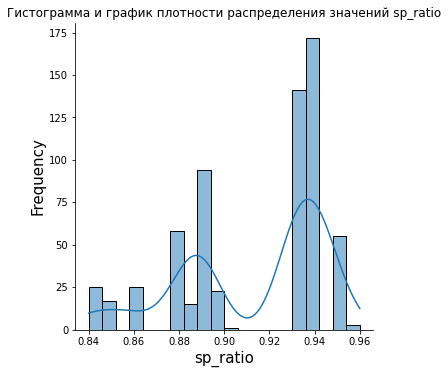

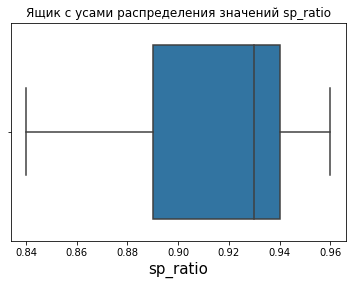

,fats_%
count,629.00
mean,3.60
median,3.65
max,3.75
min,2.99


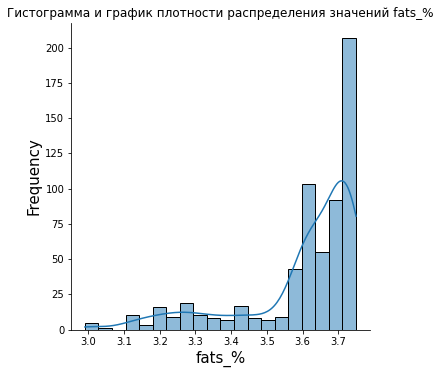

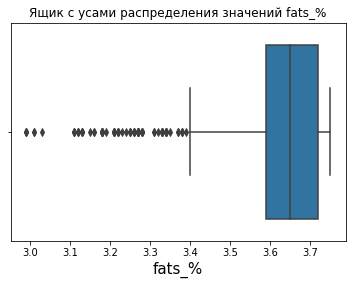

,proteins_%
count,629.00
mean,3.08
median,3.08
max,3.08
min,3.07


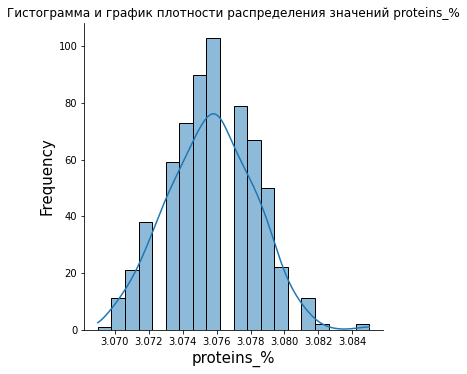

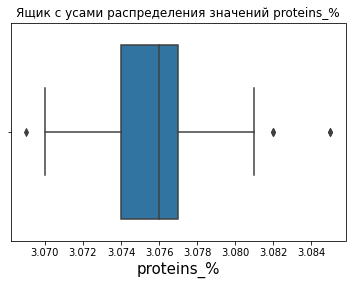

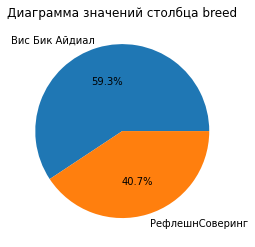

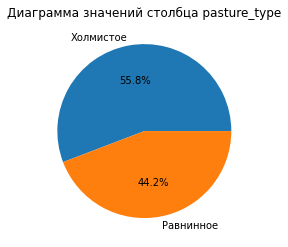

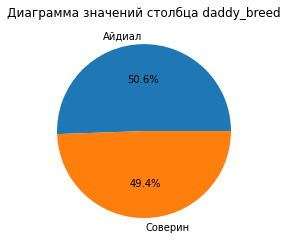

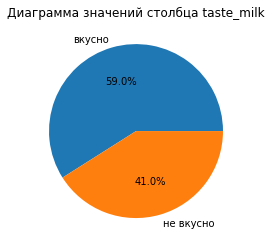

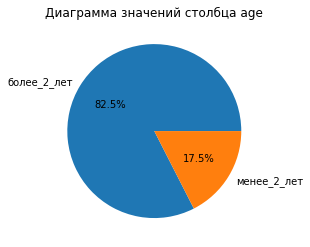

In [7]:
def histogram(data):
    for col in data.select_dtypes(include=['float64', 'int64']).columns:
        if col != 'id':
            display(round(data[col].agg(['count', 'mean', 'median', 'max', 'min']), 2).to_frame())
            sns.displot(x=data[col], kde=True, multiple='stack', bins=20)
            plt.title('Гистограмма и график плотности распределения значений {}'.format(col))
            plt.xlabel(col, fontsize=15)
            plt.ylabel('Frequency', fontsize=15)
            plt.show()   
            sns.boxplot(x=data[col])
            plt.title('Ящик с усами распределения значений {}'.format(col))
            plt.xlabel(col, fontsize=15)
            plt.show()
    
    for col in data.select_dtypes(include='object').columns:
        plt.pie(x=data[col].value_counts(), labels = data[col].value_counts().index, autopct='%1.1f%%')
        plt.title('Диаграмма значений столбца {}'.format(col))
        plt.show()


histogram(df1)

В столбце `milk_kg` обнаружено аномальное значение (45616). Предположительно, была допущена ошибка при вводе данных. Удалим данное значение.

В столбцах `efu`, `protein_g`, `sp_ratio`, `fats_%` наблюдаются локальные выбросы. Вероятно, это связано со спецификой состава молока и корма, т.к. общее распределение данных выглядит корректно.

В столбце `proteins_%` наблюдается нормальное распределение.

---

### Второй датафрейм:

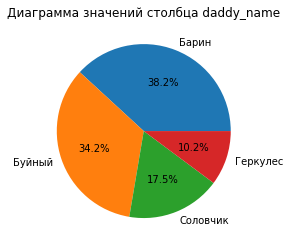

In [8]:
histogram(df2)

Во втором датафрейме количественных данных нет.

---

### Третий датафрейм:

,fats_%
count,16.00
mean,3.57
median,3.58
max,3.77
min,3.34


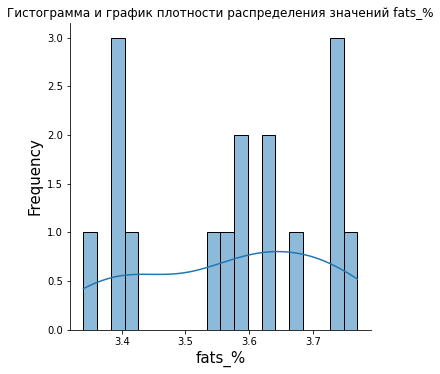

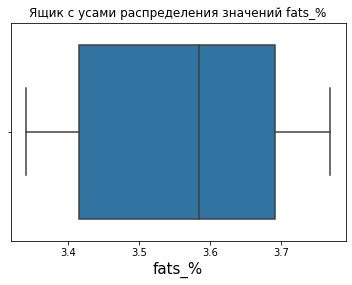

,proteins_%
count,16.00
mean,3.07
median,3.07
max,3.08
min,3.05


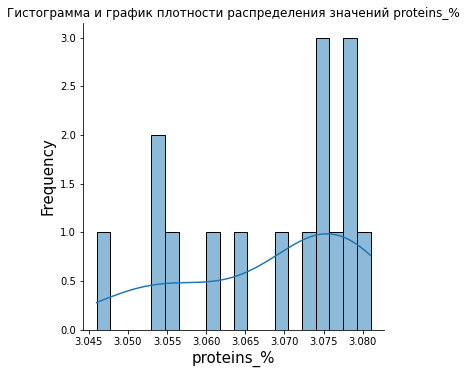

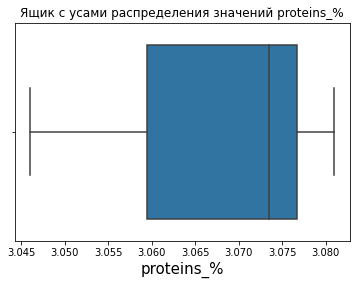

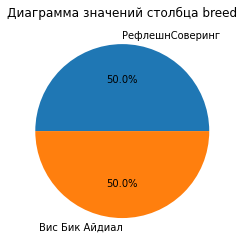

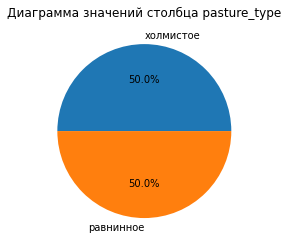

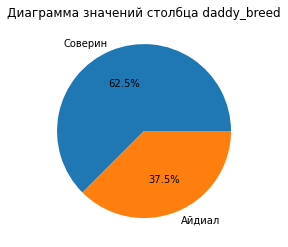

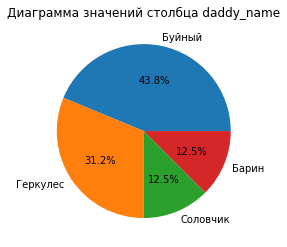

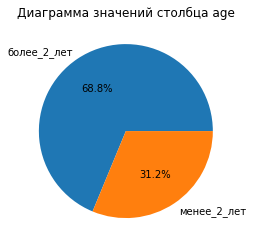

In [9]:
df1 = df1.query('milk_kg < 8000')

histogram(df3)

На первый взгляд, данные выглядят некорректно, т.к. нормального распределения не наблюдается. Однако, выборка слишком мала, поэтому "выбросы" сильно искажают её. К тому же функции агрегирования практически совпадают с данными первого датафрейма.

---

### Промежуточные выводы:

Первый датафрейм:

* В столбце `milk_kg` обнаружено аномальное значение. Предположительно, была допущена ошибка при вводе данных; 
* В столбцах `efu`, `protein_g`, `sp_ratio`, `fats_%` наблюдаются локальные выбросы. Вероятно, это связано со спецификой состава молока и корма, т.к. общее распределение данных выглядит корректно;
* В столбце `proteins_%` наблюдается нормальное распределение.

Во втором датафрейме количественных данных нет.

Третий датафрейм:

На первый взгляд, данные выглядят некорректно, т.к. нормального распределения не наблюдается. Однако, выборка слишком мала, поэтому "выбросы" сильно искажают её. К тому же функции агрегирования практически совпадают с данными первого датафрейма.

## Корреляционный анализ

### Взаимосвязь между признаками

Изучим взаимосвязь между признаками путём расчёта коэффициентов корреляции между всеми признаками и отображения их на тепловой карте.

После этого построим диаграммы рассеяния для признака `milk_kg` и всех количественных признаков с учётом значения категориальных признаков. 

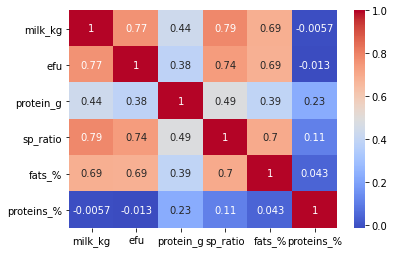

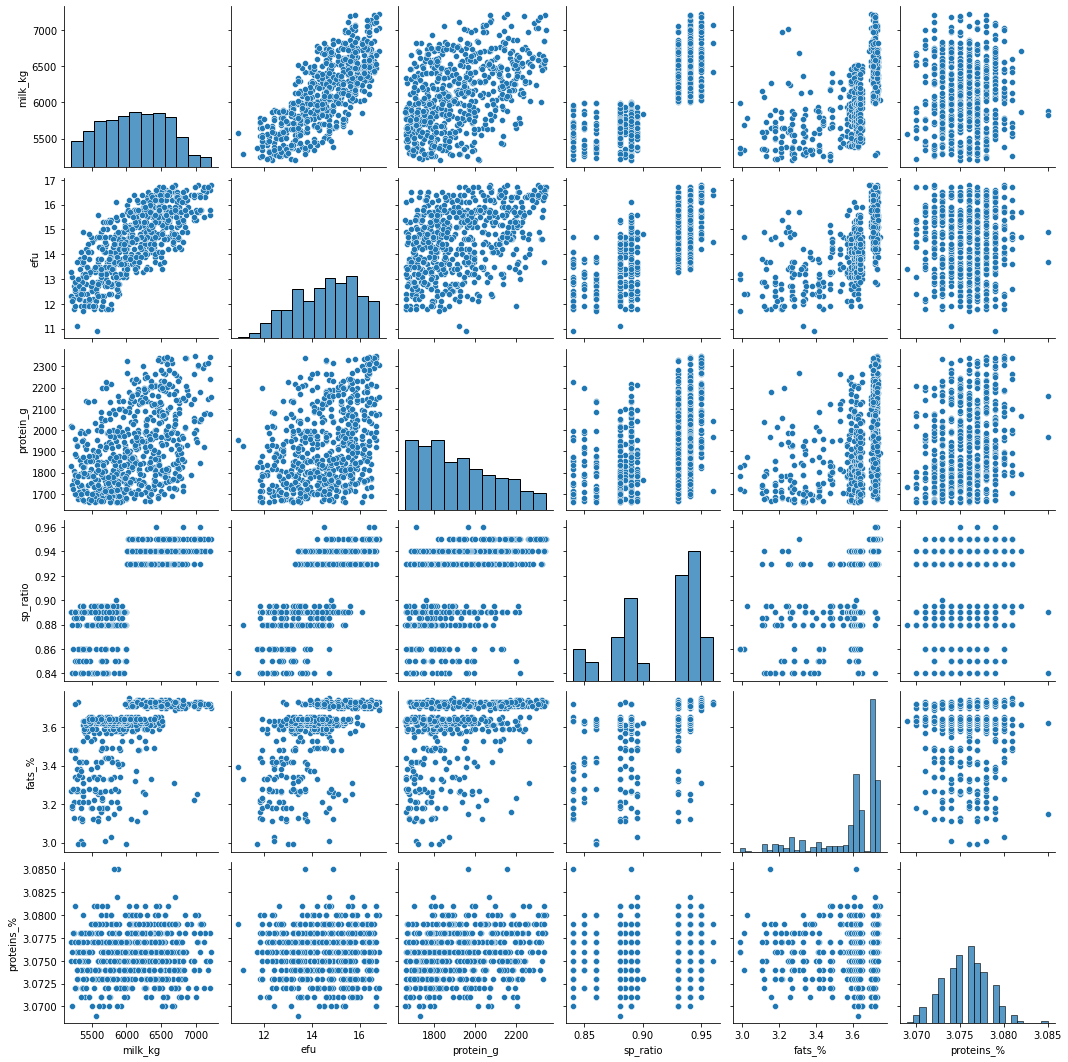

In [10]:
sns.heatmap(df1.drop(columns='id').corr(method='spearman'), annot=True, cmap='coolwarm') 
sns.pairplot(df1.drop(columns='id'))


Рассчитаем коэффициент инфляции дисперсии (VIF) для определения возможной мультиколлинеарности:

In [11]:
X = df1.copy()
X = X.drop(columns=df1.select_dtypes(include='object').columns)
X = add_constant(X) 
ds=pd.Series([variance_inflation_factor(X.values, i)   
               for i in range(X.shape[1])],   
              index=X.columns)  
print(round(ds, 2))

const         1577143.07
id                  1.02
milk_kg             3.57
efu                 2.96
protein_g           1.38
sp_ratio            3.54
fats_%              1.89
proteins_%          1.09
dtype: float64


Заметим, что целевой признак `milk_kg` имеет следующие зависимости по шкале Чеддока:

* высокую - от параметров `efu` (энергетическая кормовая единица) и `sp_ratio` (сахаро-протеиновое соотношение);
* заметную - от параметра `fats_%` (содержание жиров в молоке);
* умеренную - от параметра `protein_g` (содержание сырого протеина в корме);
* нулевую - от параметра `proteins_%` (содержания белков в молоке).

**Мультиколлинеарности нет,** т.к. коэффициенты инфляции дисперсии меньше 5. 

---

### Построение диаграмм рассеяния

Построим диаграммы рассеяния. Для параметра `col` логично выбрать парметры `breed` и `age`: возраст и порода коровы, я считаю, являются в большей степени определяющими. Также полезно разным цветом выделить вкус молока - для фермера это тоже без преувеличения "целевой параметр".

Второстепенные диаграммы рассеяния построим на основе `pasture_type` и `daddy_breed`: возможно, обнаружатся заслуживающие внимание закономерности в типах поля и породы родителя. Градацию по вкусу также применим.

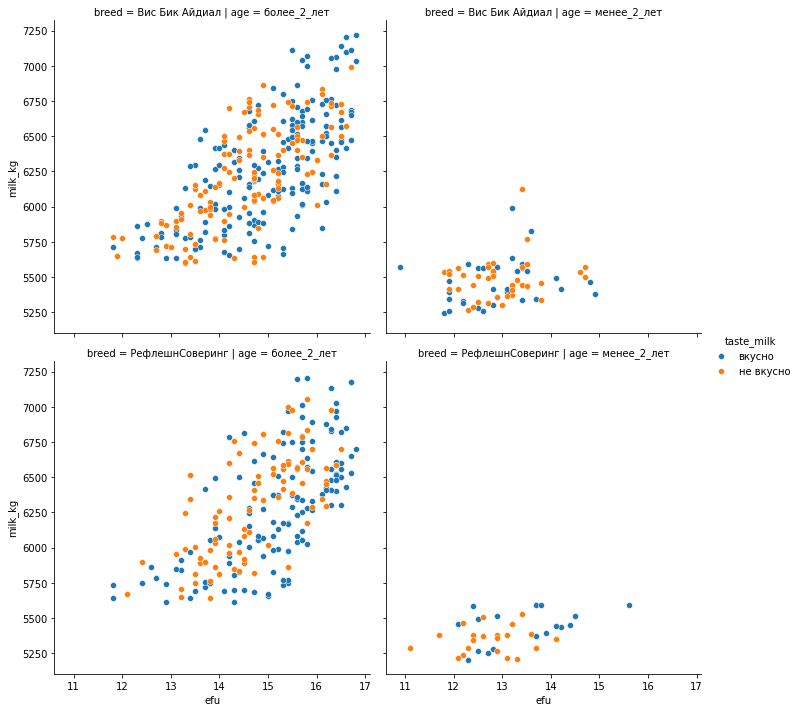

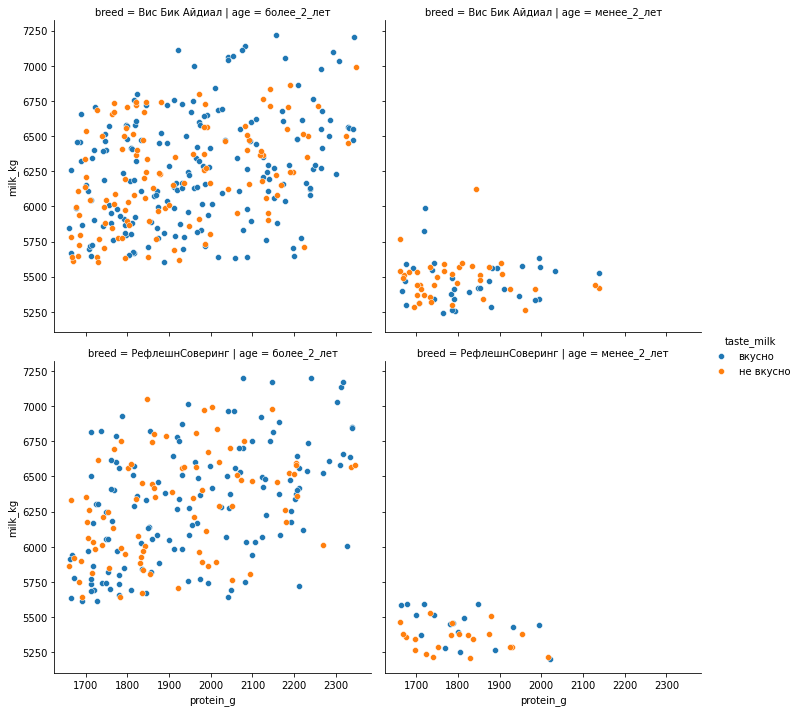

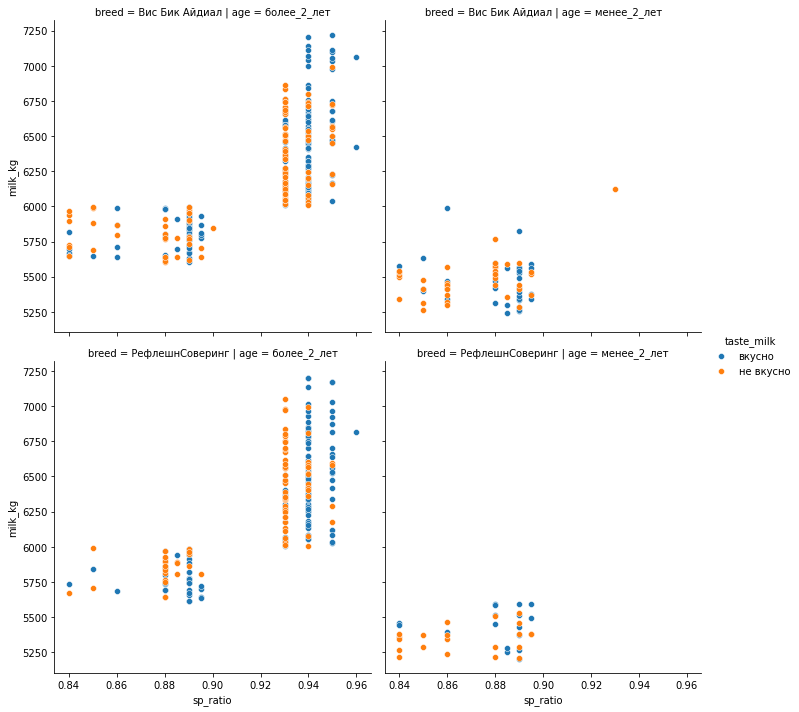

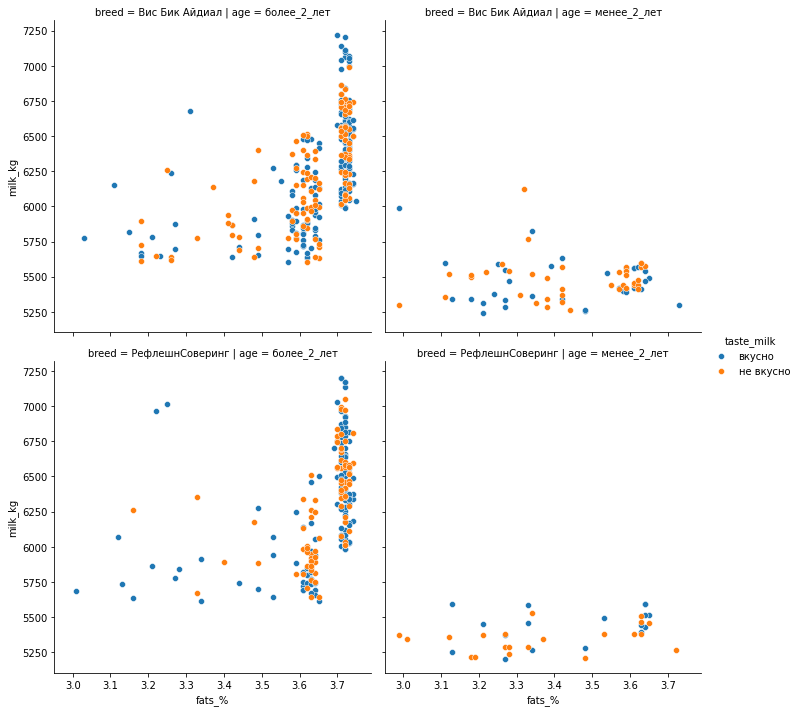

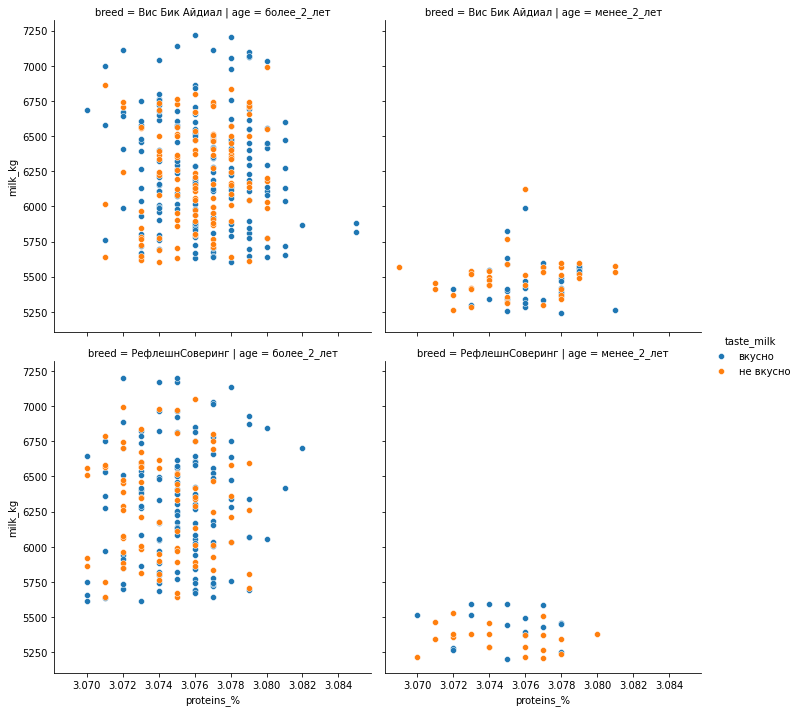

In [12]:
for row in ['efu', 'protein_g', 'sp_ratio', 'fats_%', 'proteins_%']:  
    g = sns.FacetGrid(data=df1, col='age', row='breed', hue='taste_milk', height=5, aspect=1)#, , hue='taste_milk')
    g.map(sns.scatterplot, row, 'milk_kg') 
    g.add_legend()

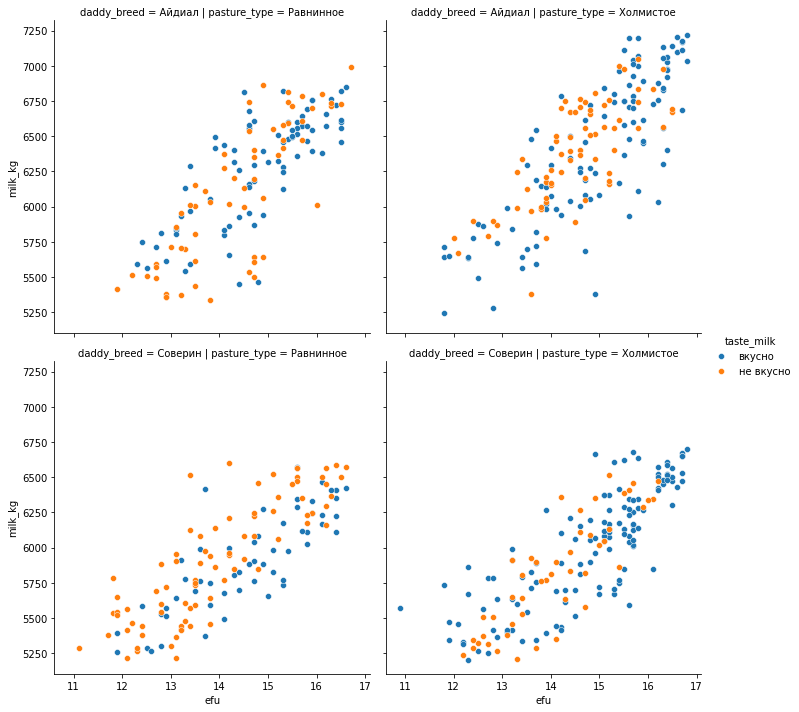

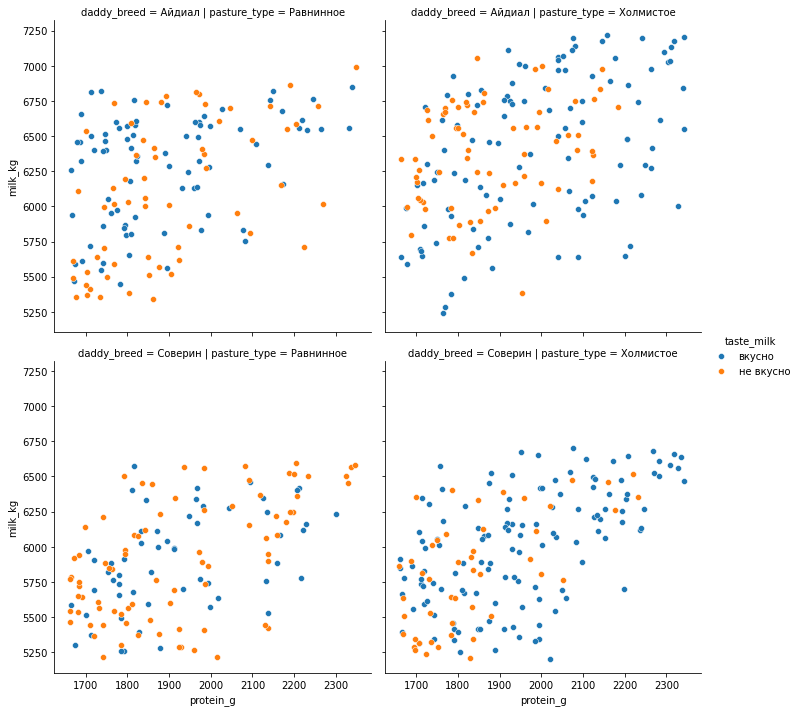

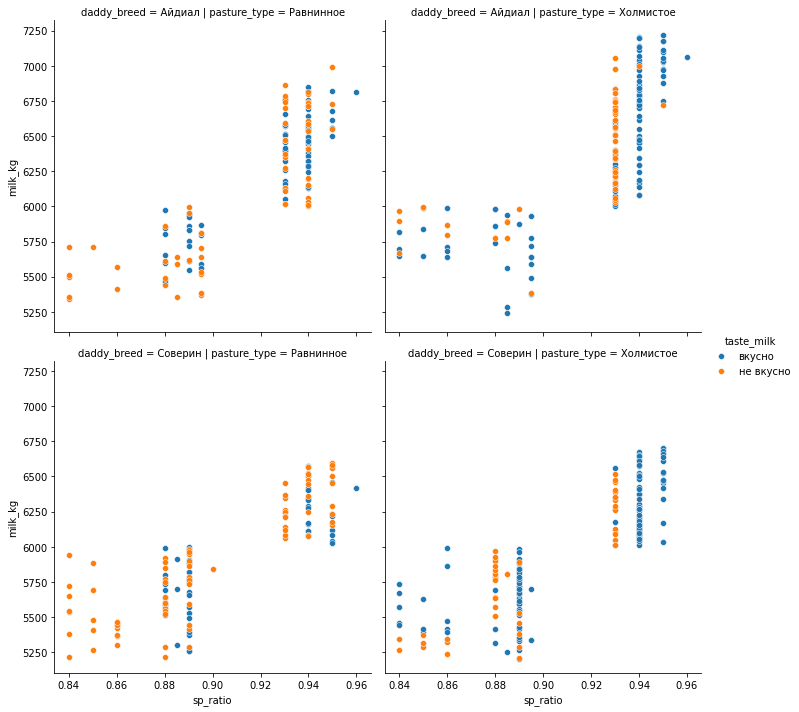

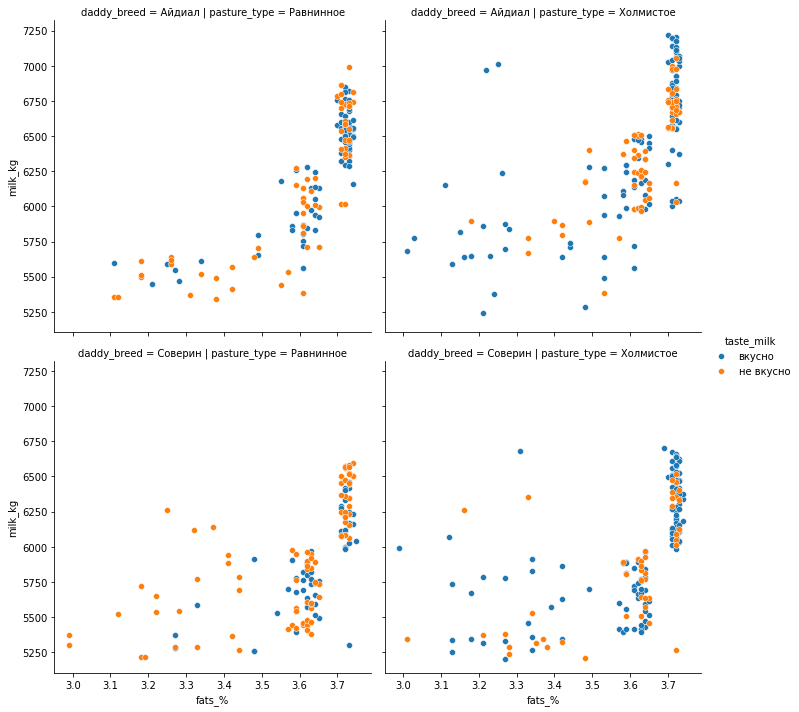

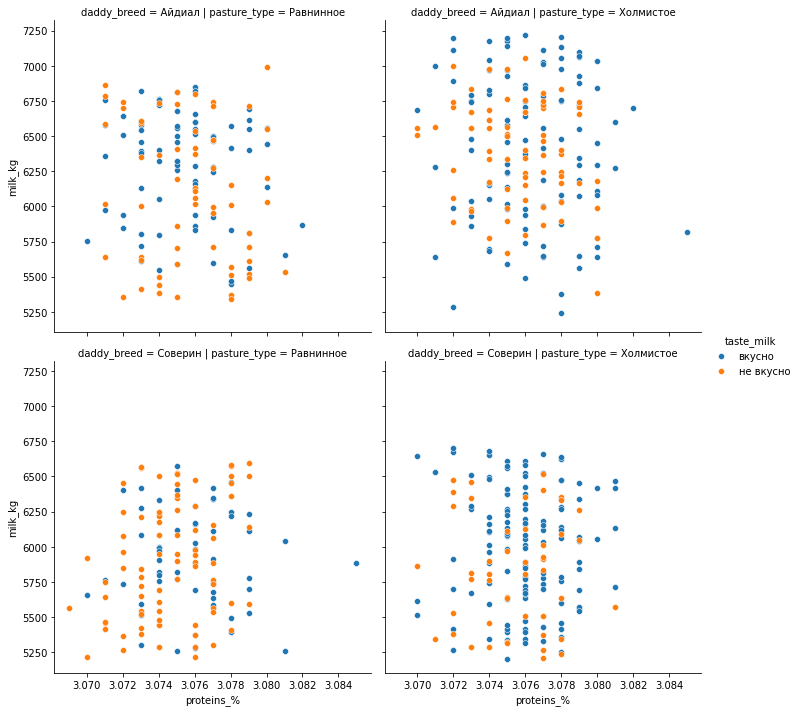

In [13]:
for row in ['efu', 'protein_g', 'sp_ratio', 'fats_%', 'proteins_%']:  
        g = sns.FacetGrid(data=df1, col='pasture_type', row='daddy_breed', hue='taste_milk', height=5, aspect=1)#, , hue='taste_milk')
        g.map(sns.scatterplot, row, 'milk_kg') 
        g.add_legend()

По полученным графикам можно сделать следующие выводы:

* возраст коров сильно влияет на удой коров и вкус молока: средняя масса удоя молока у коров обеих пород моложе 2 лет колеблется в районе 5000-5600 кг, старше 2 лет - в диапазоне 5500-8000 кг! В то же время можно заметить, что у "молодых" коров обеих пород значения вкуса "не вкусное" в основном превалирует над "вкусными" надоями. У старших коров распределение вкуса выглядит более равномерно;

* интересно отметить, что у "молодых" коров обеих пород практически отсутствует зависимость удоя молока от количественных параметров: диапазон массы молока практически стабилен;

* у "старых" коров обеих пород при определённом значении `sp_ratio` (~0,93) появляется большое количество "не вкусных" удоев;

* во второстепенных диаграммах рассеяния вкусовые параметры распределны относительно равномерно. Однако, у замченного ранее определённого значения `sp_ratio` (~0,93) больше "вкусного" молока у коров от быков породы "Айдиал", которые пасутся на равнинном поле;

* зрительно можно предположить, что зависимость параметра `milk_kg` от `fats_%`, `sp_ratio` и `efu` является нелинейной. Оценку целесообразности введения дополнительных параметров для данной зависимости на данный момент дать не могу;

* в остальном прослеживается корреляция, она согласуется с вышеуказанной тепловой картой.

---

### Промежуточные выводы:

Целевой признак `milk_kg` имеет следующие зависимости по шкале Чеддока:

* высокую - от параметров `efu` (энергетическая кормовая единица) и `sp_ratio` (сахаро-протеиновое соотношение);
* заметную - от параметра `fats_%` (содержание жиров в молоке);
* умеренную - от параметра `protein_g` (содержание сырого протеина в корме);
* нулевую - от параметра `proteins_%` (содержания белков в молоке).

**Мультиколлинеарности нет,** т.к. коэффициенты инфляции дисперсии меньше 5.

По диаграммам рассеяния можно сделать определённые выводы о зависимости массового удоя и вкусовых качеств молока не только от количественных, но и категориальных признаков (первостепенно - от возраста и породы коров).

Можно предположить, что зависимость параметра `milk_kg` от `fats_%`, `sp_ratio` и `efu` является нелинейной.

## Обучение модели линейной регрессии

Создадим и обучим три модели простой линейной регрессии.

Т.к. целевым признаком является удой `milk_kg`, отберём для обучения и прогнозирования следующие параметры:

* `sp_ratio` (сахаро-протеиновое соотношение) и `protein_g` (содержание сырого протеина в корме), тип пастбища `pasture_type` - качество корма является одним из основополагаюших факторов, влияющих на удои. Также немаловажно, где именно паслась корова;

* порода коровы `breed`, возраст `age`, порода папы коровы `daddy_breed` - генетическая составляющая и возраст могут иметь свой вес во влиянии на удои;

* содержание жиров и белков в молоке `fats_%`, `proteins_%`.

Вкус молока `taste_milk`, `id` коровы на удои не влияют.

---

### Формирование исходных массивов данных:

In [14]:
X_1 = df1.drop(['milk_kg', 'taste_milk', 'id', 'fats_%', 'proteins_%'], axis=1).copy()
display(X_1)
y_1 = df1['milk_kg'].copy()
display(y_1)

,efu,protein_g,sp_ratio,breed,pasture_type,daddy_breed,age
0,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет
1,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет
2,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,более_2_лет
3,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,более_2_лет
4,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет
...,...,...,...,...,...,...,...
624,15.4,1964,0.940,РефлешнСоверинг,Равнинное,Айдиал,более_2_лет
625,12.9,1700,0.880,РефлешнСоверинг,Равнинное,Соверин,менее_2_лет
626,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,более_2_лет
627,13.8,1994,0.890,РефлешнСоверинг,Равнинное,Соверин,более_2_лет


0      5863
1      5529
2      5810
3      5895
4      5302
       ... 
624    6812
625    5513
626    5970
627    5746
628    6503
Name: milk_kg, Length: 628, dtype: int64

### Подготовка данных

Масштабируем количественные признаки с помощью стандартизации и закодируем категориальные признаки для тренировочной и тестовой выборок. Затем объединим подготовленные количественные и категориальные данные в датафрейм.

In [15]:
RANDOM_STATE = 42
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    X_1, 
    y_1, 
    random_state=RANDOM_STATE
) 

print(X_train_1.shape)
print(X_test_1.shape)
print(y_train_1.shape)
print(y_test_1.shape)

cat_col_names_1 = ['breed', 'pasture_type', 'daddy_breed', 'age']
num_col_names_1 = ['efu', 'sp_ratio', 'protein_g']


scaler_1 = StandardScaler()
X_train_scaled_1 = scaler_1.fit_transform(X_train_1[num_col_names_1])
X_test_scaled_1 = scaler_1.transform(X_test_1[num_col_names_1])


encoder_1 = OneHotEncoder(drop='first', sparse_output=False)
X_train_ohe_1 = encoder_1.fit_transform(X_train_1[cat_col_names_1]) 
X_test_ohe_1 = encoder_1.transform(X_test_1[cat_col_names_1])
encoder_col_names_1 = encoder_1.get_feature_names_out()


X_train_ohe_1 = pd.DataFrame(X_train_ohe_1, columns=encoder_col_names_1)
X_test_ohe_1 = pd.DataFrame(X_test_ohe_1, columns=encoder_col_names_1)

X_train_scaled_1 = pd.DataFrame(X_train_scaled_1, columns=num_col_names_1)
X_test_scaled_1 = pd.DataFrame(X_test_scaled_1, columns=num_col_names_1)

X_train_1 = pd.concat([X_train_ohe_1, X_train_scaled_1], axis=1)
X_test_1 = pd.concat([X_test_ohe_1, X_test_scaled_1], axis=1)

display(X_train_1)
display(X_test_1)

(471, 7)
(157, 7)
(471,)
(157,)


,breed_РефлешнСоверинг,pasture_type_Холмистое,daddy_breed_Соверин,age_менее_2_лет,efu,sp_ratio,protein_g
0,1.0,1.0,1.0,0.0,1.502378,0.837130,1.079523
1,1.0,1.0,1.0,1.0,-1.557270,-0.703660,-0.196920
2,0.0,0.0,0.0,0.0,0.125537,-1.011818,-1.386085
3,0.0,1.0,0.0,0.0,-0.103937,0.837130,0.752230
4,0.0,0.0,0.0,0.0,-1.098323,-0.703660,0.828598
...,...,...,...,...,...,...,...
466,1.0,1.0,0.0,0.0,-0.639376,-0.549581,1.565008
467,0.0,0.0,0.0,0.0,0.278519,0.528972,-0.998788
468,1.0,0.0,0.0,0.0,-0.868849,-1.011818,-0.818777
469,0.0,0.0,0.0,0.0,-1.098323,-1.011818,0.130373


,breed_РефлешнСоверинг,pasture_type_Холмистое,daddy_breed_Соверин,age_менее_2_лет,efu,sp_ratio,protein_g
0,0.0,1.0,0.0,0.0,-0.486393,-1.011818,-0.813322
1,1.0,1.0,1.0,0.0,1.425887,0.837130,0.026730
2,1.0,1.0,1.0,1.0,-0.486393,-1.628134,-0.682405
3,0.0,0.0,1.0,0.0,-0.945340,-1.011818,-1.058792
4,0.0,1.0,1.0,0.0,0.584484,-0.703660,-1.413360
...,...,...,...,...,...,...,...
152,0.0,1.0,0.0,0.0,1.655361,0.528972,0.506760
153,1.0,1.0,0.0,0.0,0.660975,0.837130,0.714046
154,0.0,0.0,0.0,0.0,0.584484,0.837130,0.114008
155,0.0,0.0,0.0,0.0,0.278519,-0.549581,-0.415116


Данные подготовлены для обучения. Построим гистограмму частотного распределения и ящик с усами для количественных признаков, чтобы убедиться в правильности выполнения масштабирования:

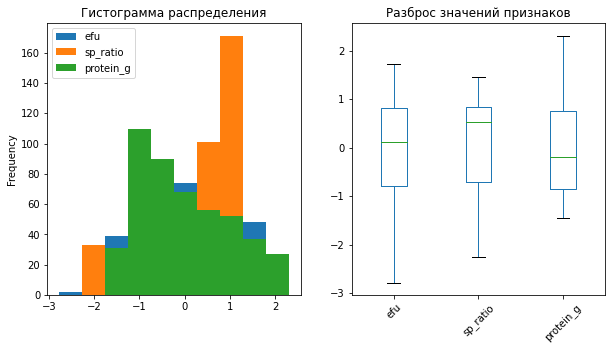

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train_1[num_col_names_1].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train_1[num_col_names_1].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

В распределениях наблюдаются смещения на 1 влево у параметра `protein_g` и на 1 вправо у параметра `sp_ratio`. Выбросы отсутствуют.

### Обучение модели

Обучим модель и получим предсказания на тестовой выборке. Посчитаем метрику качества модели R^{2} на тестовых данных, выведем график распределния остатков и диаграмму рассеяния дисперсии.

R2 LinearRegression = 0.78


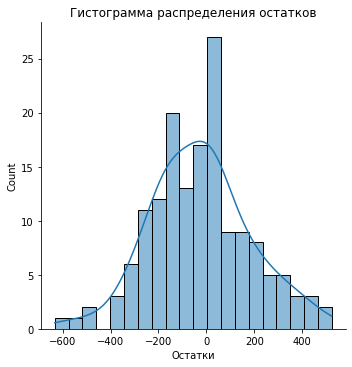

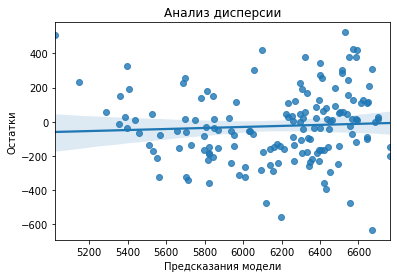

In [17]:
model_lr_1  = LinearRegression()
model_lr_1.fit(X_train_1, y_train_1) 
predictions_1 = model_lr_1.predict(X_test_1)

r2 = r2_score(y_test_1, predictions_1)  
print("R2 LinearRegression =", round(r2, 2))

residuals_1 = y_test_1 - predictions_1

sns.displot(residuals_1, kde=True, multiple='stack', bins=20)
plt.title('Гистограмма распределения остатков')
plt.xlabel('Остатки')
plt.show()

fig, ax = plt.subplots()
sns.regplot(x=predictions_1, y=residuals_1, fit_reg=True)
plt.xlabel('Предсказания модели')
plt.ylabel('Остатки')
plt.title('Анализ дисперсии')
plt.show()


### Промежуточные выводы:
 
* значение R² модели составляет 0,79;
* анализ остатков показывает нормальное распределение со смещением влево на -66, наблюдается наличие "выбросов" (около -700, -500, 300, 400, 600). Анализ дисперсии показывает наличие "рупора".

Исходя из вышеперечисленного, для улучшения качества модели **необходимо найти и добавить в модель дополнительные признаки, а также обработать нелинейниые зависимости.**

### Подготовка данных с учётом связи входных признаков с целевым

`sp_ratio` и `milk_kg` связаны нелинейно. На их диаграмме рассеяния наблюдения сгруппированы в два кластера, причём есть такое значение `sp_ratio`, которое можно считать границей между кластерами (0,9). Чтобы устранить нелинейность, преобразуем `sp_ratio` в категориальный бинарный признак, использовав эту границу.

`efu` и `milk_kg` связаны нелинейно. Нелинейность между ними можно исключить, если ввести новый признак `efu_square` (т.е., возвести признак в квадрат).

In [18]:
X_2 = df1.drop(['milk_kg', 'taste_milk', 'id', 'fats_%', 'proteins_%'], axis=1).copy()
X_2['efu'] = X_2['efu']**2
X_2['sp_ratio'] = X_2['sp_ratio'].apply(lambda x: True if x > 0.915 else False)
X_2.rename(columns={'efu': 'efu_square', 'sp_ratio': 'sp_ratio_bool'}, inplace=True)
display(X_2)

y_2 = df1['milk_kg'].copy()
display(y_2)

,efu_square,protein_g,sp_ratio_bool,breed,pasture_type,daddy_breed,age
0,201.64,1743,False,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет
1,163.84,2138,False,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет
2,196.00,1854,False,РефлешнСоверинг,Холмистое,Соверин,более_2_лет
3,153.76,2012,False,РефлешнСоверинг,Холмистое,Айдиал,более_2_лет
4,163.84,1675,False,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет
...,...,...,...,...,...,...,...
624,237.16,1964,True,РефлешнСоверинг,Равнинное,Айдиал,более_2_лет
625,166.41,1700,False,РефлешнСоверинг,Равнинное,Соверин,менее_2_лет
626,207.36,1837,False,РефлешнСоверинг,Холмистое,Соверин,более_2_лет
627,190.44,1994,False,РефлешнСоверинг,Равнинное,Соверин,более_2_лет


0      5863
1      5529
2      5810
3      5895
4      5302
       ... 
624    6812
625    5513
626    5970
627    5746
628    6503
Name: milk_kg, Length: 628, dtype: int64

In [19]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X_2, 
    y_2, 
    random_state=RANDOM_STATE,
) 

print(X_train_2.shape)
print(X_test_2.shape)
print(y_train_2.shape)
print(y_test_2.shape)

cat_col_names_2 = ['breed', 'sp_ratio_bool', 'pasture_type', 'daddy_breed', 'age']
num_col_names_2 = ['efu_square', 'protein_g']


scaler_2 = StandardScaler()
X_train_scaled_2 = scaler_2.fit_transform(X_train_2[num_col_names_2])
X_test_scaled_2 = scaler_2.transform(X_test_2[num_col_names_2])


encoder_2 = OneHotEncoder(drop='first', sparse_output=False)
X_train_ohe_2 = encoder_2.fit_transform(X_train_2[cat_col_names_2]) 
X_test_ohe_2 = encoder_2.transform(X_test_2[cat_col_names_2])
encoder_col_names_2 = encoder_2.get_feature_names_out()


X_train_ohe_2 = pd.DataFrame(X_train_ohe_2, columns=encoder_col_names_2)
X_test_ohe_2 = pd.DataFrame(X_test_ohe_2, columns=encoder_col_names_2)

X_train_scaled_2 = pd.DataFrame(X_train_scaled_2, columns=num_col_names_2)
X_test_scaled_2 = pd.DataFrame(X_test_scaled_2, columns=num_col_names_2)

X_train_2 = pd.concat([X_train_ohe_2, X_train_scaled_2], axis=1)
X_test_2 = pd.concat([X_test_ohe_2, X_test_scaled_2], axis=1)

display(X_train_2)
display(X_test_2)

(471, 7)
(157, 7)
(471,)
(157,)


,breed_РефлешнСоверинг,sp_ratio_bool_True,pasture_type_Холмистое,daddy_breed_Соверин,age_менее_2_лет,efu_square,protein_g
0,1.0,1.0,1.0,1.0,0.0,1.577968,1.079523
1,1.0,0.0,1.0,1.0,1.0,-1.511438,-0.196920
2,0.0,0.0,0.0,0.0,0.0,0.082269,-1.386085
3,0.0,1.0,1.0,0.0,0.0,-0.150235,0.752230
4,0.0,0.0,0.0,0.0,0.0,-1.102358,0.828598
...,...,...,...,...,...,...,...
466,1.0,0.0,1.0,0.0,0.0,-0.674102,1.565008
467,0.0,1.0,0.0,0.0,0.0,0.239936,-0.998788
468,1.0,0.0,0.0,0.0,0.0,-0.890627,-0.818777
469,0.0,0.0,0.0,0.0,0.0,-1.102358,0.130373


,breed_РефлешнСоверинг,sp_ratio_bool_True,pasture_type_Холмистое,daddy_breed_Соверин,age_менее_2_лет,efu_square,protein_g
0,0.0,0.0,1.0,0.0,0.0,-0.527089,-0.813322
1,1.0,1.0,1.0,1.0,0.0,1.490346,0.026730
2,1.0,0.0,1.0,1.0,1.0,-0.527089,-0.682405
3,0.0,0.0,0.0,1.0,0.0,-0.961737,-1.058792
4,0.0,0.0,1.0,1.0,0.0,0.561660,-1.413360
...,...,...,...,...,...,...,...
152,0.0,1.0,1.0,0.0,0.0,1.754809,0.506760
153,1.0,1.0,1.0,0.0,0.0,0.643423,0.714046
154,0.0,1.0,0.0,0.0,0.0,0.561660,0.114008
155,0.0,0.0,0.0,0.0,0.0,0.239936,-0.415116


### Обучение обновлённой модели

Обучим обновлённую модель и получим предсказания на тестовой выборке. Посчитаем метрику качества модели R^{2} на тестовых данных, выведем график распределния остатков и диаграмму рассеяния дисперсии.

R2 LinearRegression = 0.82


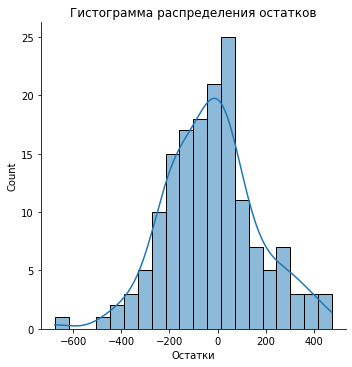

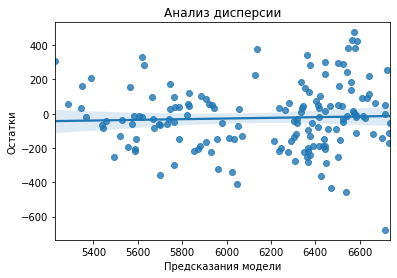

In [20]:
model_lr_2  = LinearRegression()
model_lr_2.fit(X_train_2, y_train_2) 
predictions_2 = model_lr_2.predict(X_test_2)

r2 = r2_score(y_test_2, predictions_2)  
print("R2 LinearRegression =", round(r2, 2))

residuals_2 = y_test_2 - predictions_2

sns.displot(residuals_2, kde=True, multiple='stack', bins=20)
plt.title('Гистограмма распределения остатков')
plt.xlabel('Остатки')
plt.show()

fig, ax = plt.subplots()
sns.regplot(x=predictions_2, y=residuals_2, fit_reg=True)
plt.xlabel('Предсказания модели')
plt.ylabel('Остатки')
plt.title('Анализ дисперсии')
plt.show()

### Промежуточные выводы:
 
* значение R² модели составляет 0,82;
* анализ остатков показывает нормальное распределение, **смещение отсутствует, количество "выбросов" снизилось** (около -700, 300). Анализ дисперсии также показывает наличие "рупора".

Исходя из вышеперечисленного, для улучшения качества модели **необходимо найти и добавить в модель дополнительные признаки.**

### Подготовка данных с учётом добавления в модель дополнительного признака

Добавим признак `daddy_name` из второго датафрейма, соединив его с остальными данными. Устраним нелинейность между признаками.

In [21]:
X_3 = df1.drop(['milk_kg', 'taste_milk', 'fats_%', 'proteins_%'], axis=1).copy()
X_3['efu'] = X_3['efu']**2
X_3['sp_ratio'] = X_3['sp_ratio'].apply(lambda x: True if x > 0.9 else False)
X_3.rename(columns={'efu': 'efu_square', 'sp_ratio': 'sp_ratio_bool'}, inplace=True)
X_3 = X_3.merge(df2, on='id', how='left')
X_3.drop(columns='id', inplace=True)
display(X_3)

y_3 = df1['milk_kg'].copy()
display(y_3)

,efu_square,protein_g,sp_ratio_bool,breed,pasture_type,daddy_breed,age,daddy_name
0,201.64,1743,False,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет,Буйный
1,163.84,2138,False,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,Соловчик
2,196.00,1854,False,РефлешнСоверинг,Холмистое,Соверин,более_2_лет,Барин
3,153.76,2012,False,РефлешнСоверинг,Холмистое,Айдиал,более_2_лет,Буйный
4,163.84,1675,False,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,Барин
...,...,...,...,...,...,...,...,...
623,237.16,1964,True,РефлешнСоверинг,Равнинное,Айдиал,более_2_лет,Буйный
624,166.41,1700,False,РефлешнСоверинг,Равнинное,Соверин,менее_2_лет,Барин
625,207.36,1837,False,РефлешнСоверинг,Холмистое,Соверин,более_2_лет,Барин
626,190.44,1994,False,РефлешнСоверинг,Равнинное,Соверин,более_2_лет,Барин


0      5863
1      5529
2      5810
3      5895
4      5302
       ... 
624    6812
625    5513
626    5970
627    5746
628    6503
Name: milk_kg, Length: 628, dtype: int64

### Обучение обновлённой модели

Обучим обновлённую модель и получим предсказания на тестовой выборке. Посчитаем метрику качества модели R^{2} на тестовых данных, выведем график распределния остатков и диаграмму рассеяния дисперсии.

In [22]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(
    X_3, 
    y_3, 
    random_state=RANDOM_STATE
) 

print(X_train_3.shape)
print(X_test_3.shape)
print(y_train_3.shape)
print(y_test_3.shape)

cat_col_names_3 = ['breed', 'sp_ratio_bool', 'pasture_type', 'daddy_breed', 'age', 'daddy_name']
num_col_names_3 = ['efu_square', 'protein_g']


scaler_3 = StandardScaler()
X_train_scaled_3 = scaler_3.fit_transform(X_train_3[num_col_names_3])
X_test_scaled_3 = scaler_3.transform(X_test_3[num_col_names_3])


encoder_3 = OneHotEncoder(drop='first', sparse_output=False)
X_train_ohe_3 = encoder_3.fit_transform(X_train_3[cat_col_names_3]) 
X_test_ohe_3 = encoder_3.transform(X_test_3[cat_col_names_3])
encoder_col_names_3 = encoder_3.get_feature_names_out()


X_train_ohe_3 = pd.DataFrame(X_train_ohe_3, columns=encoder_col_names_3)
X_test_ohe_3 = pd.DataFrame(X_test_ohe_3, columns=encoder_col_names_3)

X_train_scaled_3 = pd.DataFrame(X_train_scaled_3, columns=num_col_names_3)
X_test_scaled_3 = pd.DataFrame(X_test_scaled_3, columns=num_col_names_3)

X_train_3 = pd.concat([X_train_ohe_3, X_train_scaled_3], axis=1)
X_test_3 = pd.concat([X_test_ohe_3, X_test_scaled_3], axis=1)

display(X_train_3)
display(X_test_3)

(471, 8)
(157, 8)
(471,)
(157,)


,breed_РефлешнСоверинг,sp_ratio_bool_True,pasture_type_Холмистое,daddy_breed_Соверин,age_менее_2_лет,daddy_name_Буйный,daddy_name_Геркулес,daddy_name_Соловчик,efu_square,protein_g
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.577968,1.079523
1,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,-1.511438,-0.196920
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.082269,-1.386085
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.150235,0.752230
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.102358,0.828598
...,...,...,...,...,...,...,...,...,...,...
466,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.674102,1.565008
467,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.239936,-0.998788
468,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.890627,-0.818777
469,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.102358,0.130373


,breed_РефлешнСоверинг,sp_ratio_bool_True,pasture_type_Холмистое,daddy_breed_Соверин,age_менее_2_лет,daddy_name_Буйный,daddy_name_Геркулес,daddy_name_Соловчик,efu_square,protein_g
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.527089,-0.813322
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.490346,0.026730
2,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,-0.527089,-0.682405
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.961737,-1.058792
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.561660,-1.413360
...,...,...,...,...,...,...,...,...,...,...
152,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.754809,0.506760
153,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.643423,0.714046
154,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.561660,0.114008
155,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.239936,-0.415116


R2 LinearRegression = 0.82


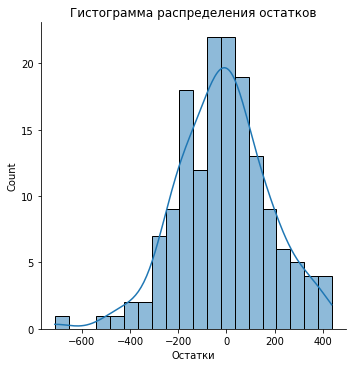

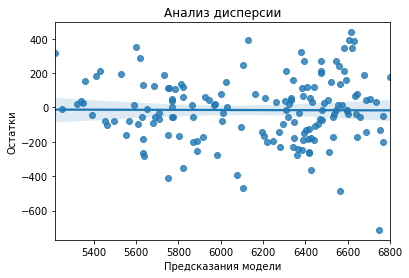

In [23]:
model_lr_3  = LinearRegression()
model_lr_3.fit(X_train_3, y_train_3) 
predictions_3 = model_lr_3.predict(X_test_3)

r2 = r2_score(y_test_3, predictions_3)  
print("R2 LinearRegression =", round(r2, 2))

residuals_3 = y_test_3 - predictions_3

sns.displot(residuals_3, kde=True, multiple='stack', bins=20)
plt.title('Гистограмма распределения остатков')
plt.xlabel('Остатки')
plt.show()

fig, ax = plt.subplots()
sns.regplot(x=predictions_3, y=residuals_3, fit_reg=True)
plt.xlabel('Предсказания модели')
plt.ylabel('Остатки')
plt.title('Анализ дисперсии')
plt.show()

### Промежуточные выводы:
 
* значение R² модели составляет 0,82;
* анализ остатков показывает нормальное распределение, **смещение отсутствует, но количество "выбросов" увеличилось** (около -700, -500, -200, 400). В то же время анализ дисперсии показывает **смещение "рупора" в сторону нормальной дисперсии.**

Исходя из вышеперечисленного, для определения лучшей модели **необходимо найти и сравнить их дополнительные метрики.**

---

### Оценка метрик моделей

Оценим качество каждой модели по трём метрикам (MSE, RMSE, MAE):

In [24]:
tuples_list = [(y_test_1, predictions_1), (y_test_2, predictions_2), (y_test_3, predictions_3)]
i = 1
for tuple in tuples_list:
    test, pred = tuple
    print('Модель', i)
    i += 1
    print('RMSE:', round(mean_squared_error(test, pred, squared = False), 2))
    print('MSE:', round(mean_squared_error(test, pred), 2))
    print('MAE:', round(mean_absolute_error(test, pred), 2))
    print()

pred = pd.Series(data=predictions_3)
print('Доверительный интервал от 2,5% до 97,5%:')
print(round(pred.quantile(0.025), 2))
print(round(pred.quantile(0.975), 2))

Модель 1
RMSE: 209.49
MSE: 43887.02
MAE: 164.24

Модель 2
RMSE: 192.43
MSE: 37030.91
MAE: 149.04

Модель 3
RMSE: 188.88
MSE: 35673.89
MAE: 146.16

Доверительный интервал от 2,5% до 97,5%:
5351.32
6749.08


### Промежуточные выводы:

Анализ метрик показывает, что лучшей моделью является третья. Её доверительный интервал при доверительной вероятности 95% находится на отрезке [5351.32; 6749.08].

---

### Испытание лучшей модели

С помощью третьей модели спрогнозируем удой коров, которых фермер хочет купить. Добавим недостающие признаки `ЭКЕ (Энергетическая кормовая единица)`, `Сырой протеин, г` и `СПО (Сахаро-протеиновое соотношение)`: возьмём из датасета `ferma_main.csv` средние значения каждого из признаков и увеличьте их на 5%. Выполним подготовку данных, аналогичную той, которую делали для тренировочной выборки.

In [25]:
for col in ['efu', 'protein_g', 'sp_ratio']:
    df3[col] = round(df1[col].mean() + df1[col].mean() * 0.05, 2)
df3_pred = df3.drop(columns=['fats_%', 'proteins_%']).copy()
display(df3_pred)

,breed,pasture_type,daddy_breed,daddy_name,age,efu,protein_g,sp_ratio
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,более_2_лет,15.28,2019.95,0.96
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,менее_2_лет,15.28,2019.95,0.96
2,РефлешнСоверинг,равнинное,Соверин,Барин,более_2_лет,15.28,2019.95,0.96
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,более_2_лет,15.28,2019.95,0.96
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,более_2_лет,15.28,2019.95,0.96
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,менее_2_лет,15.28,2019.95,0.96
6,Вис Бик Айдиал,равнинное,Соверин,Буйный,более_2_лет,15.28,2019.95,0.96
7,РефлешнСоверинг,холмистое,Айдиал,Буйный,менее_2_лет,15.28,2019.95,0.96
8,Вис Бик Айдиал,холмистое,Соверин,Соловчик,более_2_лет,15.28,2019.95,0.96
9,РефлешнСоверинг,равнинное,Соверин,Геркулес,более_2_лет,15.28,2019.95,0.96


In [26]:
X_test_lin = df3.copy()

X_test_lin['efu'] = X_test_lin['efu']**2
X_test_lin['sp_ratio'] = X_test_lin['sp_ratio'].apply(lambda x: True if x > 0.9 else False)
X_test_lin.rename(columns={'efu': 'efu_square', 'sp_ratio': 'sp_ratio_bool'}, inplace=True)
X_test_lin['pasture_type'] = X_test_lin['pasture_type'].apply(lambda x: 'Холмистое' if x == 'холмистое' else 'Равнинное')

display(X_test_lin)

,breed,pasture_type,daddy_breed,daddy_name,fats_%,proteins_%,age,efu_square,protein_g,sp_ratio_bool
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,233.4784,2019.95,True
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,233.4784,2019.95,True
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,233.4784,2019.95,True
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,233.4784,2019.95,True
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,233.4784,2019.95,True
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,233.4784,2019.95,True
6,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,233.4784,2019.95,True
7,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,233.4784,2019.95,True
8,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,233.4784,2019.95,True
9,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,233.4784,2019.95,True


Подготовка данных:

In [27]:
cat_col_names = ['breed', 'sp_ratio_bool', 'pasture_type', 'daddy_breed', 'age', 'daddy_name']
num_col_names = ['efu_square', 'protein_g']


X_test_lin_scaled = scaler_3.transform(X_test_lin[num_col_names])

X_test_lin_ohe = encoder_3.transform(X_test_lin[cat_col_names])
encoder_lin_col_names = encoder_3.get_feature_names_out()

X_test_lin_ohe = pd.DataFrame(X_test_lin_ohe, columns=encoder_lin_col_names)

X_test_lin_scaled = pd.DataFrame(X_test_lin_scaled, columns=num_col_names)

X_test_lin = pd.concat([X_test_lin_ohe, X_test_lin_scaled], axis=1)

display(X_test_lin)

,breed_РефлешнСоверинг,sp_ratio_bool_True,pasture_type_Холмистое,daddy_breed_Соверин,age_менее_2_лет,daddy_name_Буйный,daddy_name_Геркулес,daddy_name_Соловчик,efu_square,protein_g
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.545371,0.517397
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.545371,0.517397
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.545371,0.517397
3,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.545371,0.517397
4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.545371,0.517397
5,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.545371,0.517397
6,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.545371,0.517397
7,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.545371,0.517397
8,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.545371,0.517397
9,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.545371,0.517397


Прогноз удоя коров:

In [28]:
predictions = model_lr_3.predict(X_test_lin)

predictions = pd.Series(data=predictions)
df3['predictions_milk_kg'] = round(predictions, 2)
display(df3)

,breed,pasture_type,daddy_breed,daddy_name,fats_%,proteins_%,age,efu,protein_g,sp_ratio,predictions_milk_kg
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.28,2019.95,0.96,6610.43
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.28,2019.95,0.96,6379.22
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.28,2019.95,0.96,6284.51
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.28,2019.95,0.96,6593.60
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.28,2019.95,0.96,6542.65
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.28,2019.95,0.96,6425.89
6,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.28,2019.95,0.96,6571.77
7,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.28,2019.95,0.96,6401.05
8,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,15.28,2019.95,0.96,6345.22
9,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,15.28,2019.95,0.96,6618.44


### Промежуточные выводы:

Оценка качества каждой модели на тестовых данных по метрикам R^2, MSE, RMSE, MAE показала, что лучше всего прогноз по удою даёт модель №3. 

Анализ остатков показывает нормальное распределение, **смещение отсутствует, но количество "выбросов" увеличилось** (около -700, -500, -200, 400). В то же время анализ дисперсии показывает **смещение "рупора" в сторону нормальной дисперсии.**

На основе модели был сделан прогноз по удою.

## Обучение модели логистической регрессии

Подготовим данные датасета `ferma_main.csv` и обучим на них модель `LogisticRegression`. Целевой признак - вкус молока.

In [29]:
X_4 = df1.drop(['milk_kg', 'taste_milk'], axis=1).copy()
X_4['efu'] = X_4['efu']**2
X_4['sp_ratio'] = X_4['sp_ratio'].apply(lambda x: True if x > 0.9 else False)
X_4.rename(columns={'efu': 'efu_square', 'sp_ratio': 'sp_ratio_bool'}, inplace=True)
X_4 = X_4.merge(df2, on='id', how='left')
X_4.drop(columns='id', inplace=True)
display(X_4)

y_4 = df1['taste_milk'].copy()
display(y_4)


,efu_square,protein_g,sp_ratio_bool,breed,pasture_type,daddy_breed,fats_%,proteins_%,age,daddy_name
0,201.64,1743,False,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,более_2_лет,Буйный
1,163.84,2138,False,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,менее_2_лет,Соловчик
2,196.00,1854,False,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,более_2_лет,Барин
3,153.76,2012,False,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,более_2_лет,Буйный
4,163.84,1675,False,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,менее_2_лет,Барин
...,...,...,...,...,...,...,...,...,...,...
623,237.16,1964,True,РефлешнСоверинг,Равнинное,Айдиал,3.74,3.075,более_2_лет,Буйный
624,166.41,1700,False,РефлешнСоверинг,Равнинное,Соверин,3.64,3.073,менее_2_лет,Барин
625,207.36,1837,False,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,более_2_лет,Барин
626,190.44,1994,False,РефлешнСоверинг,Равнинное,Соверин,3.64,3.077,более_2_лет,Барин


0         вкусно
1         вкусно
2      не вкусно
3      не вкусно
4         вкусно
         ...    
624    не вкусно
625       вкусно
626    не вкусно
627       вкусно
628       вкусно
Name: taste_milk, Length: 628, dtype: object

In [30]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(
    X_4, 
    y_4, 
    random_state=RANDOM_STATE,
    stratify=y_4
) 

print(X_train_4.shape)
print(X_test_4.shape)
print(y_train_4.shape)
print(y_test_4.shape)

cat_col_names_4 = ['breed', 'sp_ratio_bool', 'pasture_type', 'daddy_breed', 'age', 'daddy_name']
num_col_names_4 = ['efu_square', 'protein_g', 'fats_%', 'proteins_%']


scaler_4 = StandardScaler()
X_train_scaled_4 = scaler_4.fit_transform(X_train_4[num_col_names_4])
X_test_scaled_4 = scaler_4.transform(X_test_4[num_col_names_4])

encoder_4 = OneHotEncoder(drop='first', sparse_output=False)
X_train_ohe_4 = encoder_4.fit_transform(X_train_4[cat_col_names_4]) 
X_test_ohe_4 = encoder_4.transform(X_test_4[cat_col_names_4])
encoder_col_names_4 = encoder_4.get_feature_names_out()

y_train_4 = y_train_4.apply(lambda x: 1 if x == 'вкусно' else 0)
y_test_4 = y_test_4.apply(lambda x: 1 if x == 'вкусно' else 0)

X_train_ohe_4 = pd.DataFrame(X_train_ohe_4, columns=encoder_col_names_4)
X_test_ohe_4 = pd.DataFrame(X_test_ohe_4, columns=encoder_col_names_4)

X_train_scaled_4 = pd.DataFrame(X_train_scaled_4, columns=num_col_names_4)
X_test_scaled_4 = pd.DataFrame(X_test_scaled_4, columns=num_col_names_4)

X_train_4 = pd.concat([X_train_ohe_4, X_train_scaled_4], axis=1)
X_test_4 = pd.concat([X_test_ohe_4, X_test_scaled_4], axis=1)

display(X_train_4)
display(X_test_4)
display(y_train_4)
display(y_test_4)

(471, 10)
(157, 10)
(471,)
(157,)


,breed_РефлешнСоверинг,sp_ratio_bool_True,pasture_type_Холмистое,daddy_breed_Соверин,age_менее_2_лет,daddy_name_Буйный,daddy_name_Геркулес,daddy_name_Соловчик,efu_square,protein_g,fats_%,proteins_%
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1.581572,-0.402764,-2.534761,0.959551
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.450103,0.303089,0.652992,0.166659
2,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.524807,-1.184052,0.121700,-1.419126
3,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,-1.514843,-0.257283,0.121700,0.563105
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-1.514843,-0.763773,-0.763787,2.148889
...,...,...,...,...,...,...,...,...,...,...,...,...
466,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.890355,-1.313368,0.180732,-1.815572
467,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,-0.374866,-1.221769,-1.649274,0.166659
468,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.961869,-0.575186,0.003635,0.166659
469,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.745731,1.526208,0.652992,-1.022679


,breed_РефлешнСоверинг,sp_ratio_bool_True,pasture_type_Холмистое,daddy_breed_Соверин,age_менее_2_лет,daddy_name_Буйный,daddy_name_Геркулес,daddy_name_Соловчик,efu_square,protein_g,fats_%,proteins_%
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.155648,-0.736832,0.771057,0.959551
1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.487826,1.316068,0.712024,-0.229787
2,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.590317,1.062823,0.593959,0.166659
3,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,-1.032852,-0.532081,-0.763787,0.563105
4,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.166676,-1.415744,0.180732,-0.229787
...,...,...,...,...,...,...,...,...,...,...,...,...
152,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.672622,-0.203401,0.062667,1.752443
153,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.222799,0.960448,0.712024,0.959551
154,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.222799,1.041271,0.180732,-0.626233
155,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.166676,0.098337,0.180732,-0.626233


350    0
93     0
513    0
269    0
403    1
      ..
585    0
622    0
439    0
379    1
398    1
Name: taste_milk, Length: 471, dtype: int64

141    0
130    1
555    1
397    0
297    0
      ..
485    0
78     1
617    0
310    1
20     1
Name: taste_milk, Length: 157, dtype: int64

### Обучение логистической модели

In [31]:
clf = LogisticRegression()

clf = clf.fit(X_train_4, y_train_4)
y_pred_4 = clf.predict(X_test_4)

print('Веса коэффициентов:')
for feature_number, feature_name in enumerate(X_4.columns):
    exp_weight = math.exp(clf.coef_[0, feature_number])
    print(f"{feature_name:<20}: {exp_weight:+.2f}")

Веса коэффициентов:
efu_square          : +0.83
protein_g           : +0.46
sp_ratio_bool       : +1.68
breed               : +0.97
pasture_type        : +0.92
daddy_breed         : +0.85
fats_%              : +1.06
proteins_%          : +0.63
age                 : +2.12
daddy_name          : +1.20


### Оценка метрик модели

Построим тепловую карту матрицы ошибок, рассчитаем метрики accuracy, recall, precision:

Аккуратность модели: 0.63
recall:  0.74
precision:  0.67


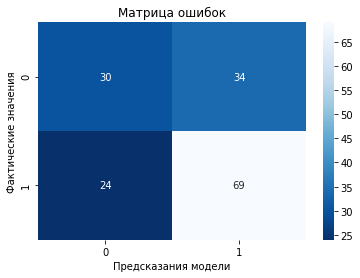

In [32]:
cm = confusion_matrix(y_test_4, y_pred_4)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.title('Матрица ошибок')
plt.ylabel('Фактические значения')
plt.xlabel('Предсказания модели')

acc = accuracy_score(y_test_4, y_pred_4)
recall = recall_score(y_test_4, y_pred_4)
precision = precision_score(y_test_4, y_pred_4)

print('Аккуратность модели:', round(acc, 2))
print('recall: ',round(recall ,2))
print('precision: ',round(precision,2))

### Промежуточные выводы:

* Аккуратность модели составляет 63%;
* больше ошибок модель совершает, присваивая значения FP (False Positive), значения метрики `recall` (учёт ложноотрицательных прогнозов) гораздо выше.

Т.к. для фермера критично, чтобы молоко было вкусное, **необходимо откалибровать модель таким образом, чтобы свести ошибки FP к минимальным значениям.**

---

### Калибровка модели

Визуализируем зависимость параметров `precision` и `recall` от `thresholds`:

     y_test_4  y_proba_4
141         0   0.622189
130         1   0.743038
555         1   0.853476
397         0   0.585563
297         0   0.508913


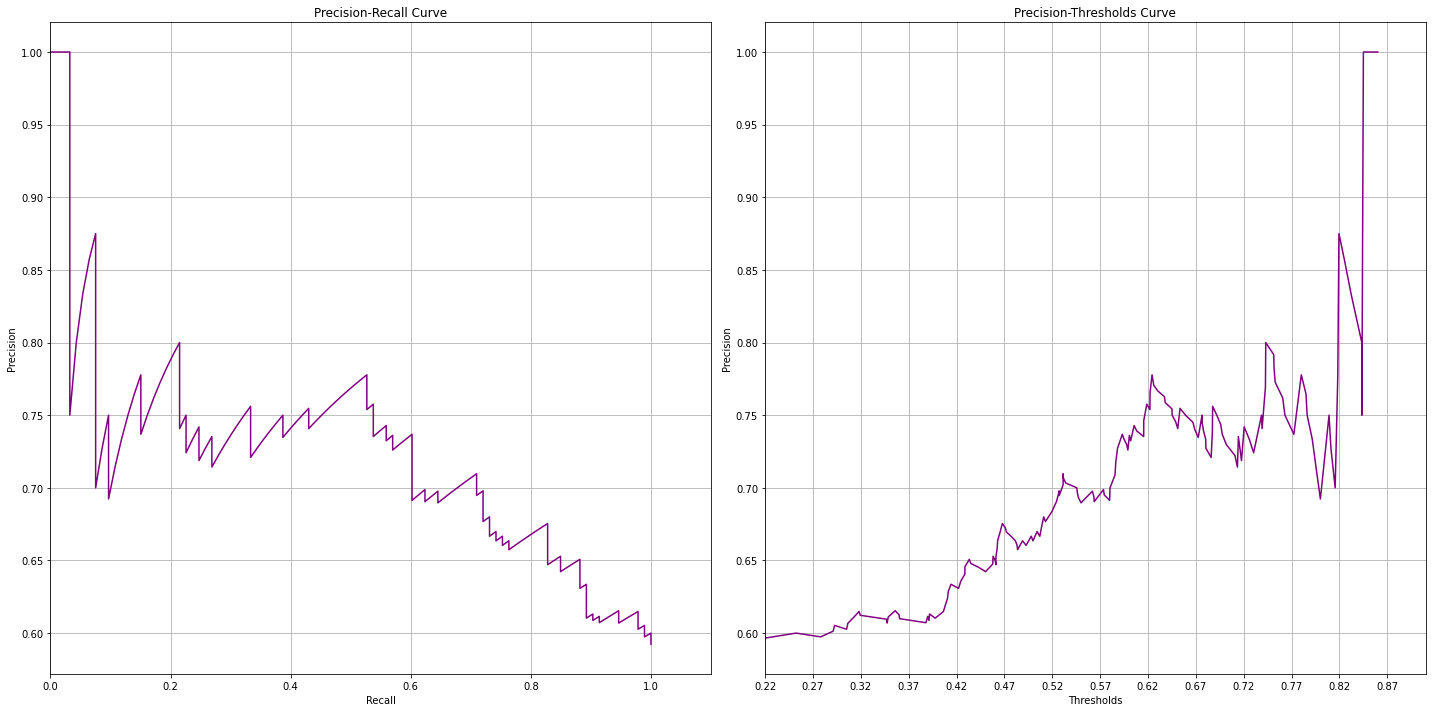

In [33]:
y_proba_4 = clf.predict_proba(X_test_4)[:,1]

data = pd.DataFrame(zip(y_test_4, y_proba_4),
             columns = ['y_test_4', 'y_proba_4'], index=y_test_4.index)

print(data.head()) 

precision, recall, thresholds = precision_recall_curve(y_test_4, y_proba_4)
thresholds = np.append(thresholds, 0.86)

plt.figure(figsize=[20, 10])

plt.subplot(1,2,1)
plt.plot(recall, precision, color='purple')
plt.title('Precision-Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.grid()
plt.xlim(0, 1.1)

plt.subplot(1,2,2)
plt.plot(thresholds, precision, color='purple')
plt.title('Precision-Thresholds Curve')
plt.ylabel('Precision')
plt.xlabel('Thresholds')
plt.grid()
plt.xlim(round(min(thresholds), 2), max(thresholds)+0.05)
plt.xticks(np.arange(round(min(thresholds), 2), max(thresholds)+0.05, 0.05))

plt.tight_layout()
plt.show()


По графикам видно, что при значении `Thresholds` > 0.845 `precision` принимает значение 1.

In [34]:
data['y_pred_4_0.845'] = data['y_proba_4'].apply(lambda x: 1 if x >= 0.845 else 0)
display(data)

,y_test_4,y_proba_4,y_pred_4_0.845
141,0,0.622189,0
130,1,0.743038,0
555,1,0.853476,1
397,0,0.585563,0
297,0,0.508913,0
...,...,...,...
485,0,0.742693,0
78,1,0.645056,0
617,0,0.622013,0
310,1,0.785035,0


### Оценка метрик откалиброванной модели

Посчитаем метрики и аккуратность, выведем матрицу ошибок:

Аккуратность модели: 0.43
recall:  0.03
precision:  1.0


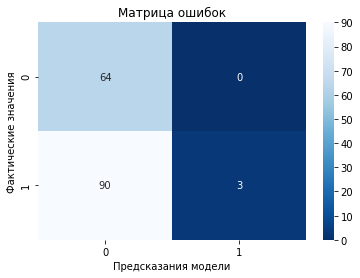

In [35]:
cm = confusion_matrix(y_test_4, data['y_pred_4_0.845'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.title('Матрица ошибок')
plt.ylabel('Фактические значения')
plt.xlabel('Предсказания модели')

acc = accuracy_score(y_test_4, data['y_pred_4_0.845'])
recall = recall_score(y_test_4, data['y_pred_4_0.845'])
precision = precision_score(y_test_4, data['y_pred_4_0.845'])

print('Аккуратность модели:', round(acc, 2))
print('recall: ',round(recall ,2))
print('precision: ',round(precision,2))

Стоит обратить внимание на тот факт, что выросло количество ложноотрицательных ошибок: с 24 до 90. Также снизилась общая аккуратность модели с 63% до 43%. Возможно, в погоне за вкусным молоком фермер рискует пропустить большое количество подходящих коров. 

---

### Испытание модели

С помощью обученной модели спрогнозируем вкус молока коров, которых фермер хочет купить. Подготовлим датафрейм `X_test_log`:

In [36]:
X_test_log = df3.copy()

X_test_log['efu'] = X_test_log['efu']**2
X_test_log['sp_ratio'] = X_test_log['sp_ratio'].apply(lambda x: True if x > 0.9 else False)
X_test_log.rename(columns={'efu': 'efu_square', 'sp_ratio': 'sp_ratio_bool'}, inplace=True)
X_test_log['pasture_type'] = X_test_log['pasture_type'].apply(lambda x: 'Холмистое' if x == 'холмистое' else 'Равнинное')

display(X_test_log)

cat_col_names = ['breed', 'sp_ratio_bool', 'pasture_type', 'daddy_breed', 'age', 'daddy_name']
num_col_names = ['efu_square', 'protein_g', 'fats_%', 'proteins_%']


X_test_log_scaled = scaler_4.transform(X_test_log[num_col_names])

X_test_log_ohe = encoder_4.transform(X_test_log[cat_col_names])
encoder_col_names = encoder_4.get_feature_names_out()

X_test_log_ohe = pd.DataFrame(X_test_log_ohe, columns=encoder_col_names)

X_test_log_scaled = pd.DataFrame(X_test_log_scaled, columns=num_col_names)

X_test_log = pd.concat([X_test_log_ohe, X_test_log_scaled], axis=1)

display(X_test_log)

,breed,pasture_type,daddy_breed,daddy_name,fats_%,proteins_%,age,efu_square,protein_g,sp_ratio_bool,predictions_milk_kg
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,233.4784,2019.95,True,6610.43
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,233.4784,2019.95,True,6379.22
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,233.4784,2019.95,True,6284.51
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,233.4784,2019.95,True,6593.60
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,233.4784,2019.95,True,6542.65
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,233.4784,2019.95,True,6425.89
6,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,233.4784,2019.95,True,6571.77
7,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,233.4784,2019.95,True,6401.05
8,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,233.4784,2019.95,True,6345.22
9,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,233.4784,2019.95,True,6618.44


,breed_РефлешнСоверинг,sp_ratio_bool_True,pasture_type_Холмистое,daddy_breed_Соверин,age_менее_2_лет,daddy_name_Буйный,daddy_name_Геркулес,daddy_name_Соловчик,efu_square,protein_g,fats_%,proteins_%
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.471566,0.496794,-0.173463,0.166659
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.471566,0.496794,-0.409592,2.148889
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.471566,0.496794,-0.114430,-0.626233
3,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.471566,0.496794,-1.236047,-5.780033
4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.471566,0.496794,0.180732,-0.626233
5,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.471566,0.496794,0.121700,-8.951602
6,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.471566,0.496794,-0.232495,1.355997
7,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.471566,0.496794,-1.236047,1.355997
8,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.471566,0.496794,0.712024,-8.158709
9,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.471566,0.496794,0.712024,-1.022679


In [37]:
predictions = clf.predict(X_test_log)
y_proba = clf.predict_proba(X_test_log)[:,1]

data = pd.DataFrame(zip(predictions, y_proba), columns = ['predictions', 'y_proba'])

data['y_pred_4_0.845'] = data['y_proba'].apply(lambda x: 1 if x >= 0.845 else 0)

display(data)

,predictions,y_proba,y_pred_4_0.845
0,1,0.755233,0
1,1,0.682763,0
2,1,0.535419,0
3,0,0.340667,0
4,1,0.500030,0
5,0,0.130891,0
6,1,0.656756,0
7,1,0.726626,0
8,0,0.187605,0
9,1,0.518004,0


### Промежуточные выводы:

* Аккуратность модели составляет 63%;
* больше ошибок модель совершает, присваивая значения FP (False Positive).

Т.к. для фермера критично, чтобы молоко было вкусное, **необходимо откалибровать модель таким образом, чтобы свести ошибки FP к минимальным значениям.**

После калибровки модели необходимо учесть, что по прогнозу **ни одна корова не даст вкусное молоко**.

## Итоговые выводы для фермера:

Выведем итоговый датафрейм с прогнозами удоев и вкуса молока по каждой корове:

In [38]:
df3['predictions_tasty_milk'] = data['predictions']
df3['predictions_tasty_milk_calibr'] = data['y_pred_4_0.845']
display(df3)

,breed,pasture_type,daddy_breed,daddy_name,fats_%,proteins_%,age,efu,protein_g,sp_ratio,predictions_milk_kg,predictions_tasty_milk,predictions_tasty_milk_calibr
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.28,2019.95,0.96,6610.43,1,0
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.28,2019.95,0.96,6379.22,1,0
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.28,2019.95,0.96,6284.51,1,0
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.28,2019.95,0.96,6593.60,0,0
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.28,2019.95,0.96,6542.65,1,0
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.28,2019.95,0.96,6425.89,0,0
6,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.28,2019.95,0.96,6571.77,1,0
7,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.28,2019.95,0.96,6401.05,1,0
8,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,15.28,2019.95,0.96,6345.22,0,0
9,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,15.28,2019.95,0.96,6618.44,1,0


**Удой каждой коровы прогнозируется свыше 6000 кг. По неоткалиброванной можели вкусное молоко будет у коров 0,1,2,4,6,7,8,11,13. По откалиброванной для исключения FP-ошибок - ни у одной из коров не будет вкусного молока.**

Если результат не устраивает фермера, можно снизить вкусовой порог с учётом увеличения рисков купить неподходящую корову.

Рекомендуется снизить порог `thresholds` до значения ~0,82: при этом значение метрики `precision` по графику `Precision-Thresholds Curve` будет составлять 0,875 (т.е., риск ошибки FP равен 12,5%).

Также **рекомендуется запросить у поставщика коров недостающие данные по характеристикам корма**, т.к. заполнение этих параметров средними значениями могло привести к сильному искажению в данных.

К тому же, максимальное значение параметра `y_proba` в третьем датафрейме равно ~0,76. Если принять порог калибровки равным этому значению, сильно падает значение метрики `precision`: по графику `Precision-Thresholds Curve` она будет составлять уже  0,74 **(т.е., риск ошибки FP равен 26%).**

**Если фермер готов к рискам получить не вкусное молоко, можно рекомендовать к покупке коров под индексами 0, 7, 11 и 13.**

## Окончательные выводы по проекту:

**Описание проекта:**
Заказчик этого исследования — фермер, владелец молочного хозяйства «Вольный луг». 
Необходимо разработать модели машинного обучения, которые помогут ему управлять рисками и принимать объективное решение о покупке бурёнок, чтобы расширить поголовье стада коров:

* Первая будет прогнозировать возможный удой коровы;
* Вторая — рассчитывать вероятность получить вкусное молоко от коровы.

**Исходные данные:**
В нашем распоряжении три датасета.

Файл ferma_main.csv содержит данные о стаде фермера на текущий момент. Описание данных:

    id — уникальный идентификатор коровы.
    Удой, кг — масса молока, которую корова даёт в год (в килограммах).
    ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
    Сырой протеин, г — содержание сырого протеина в корме (в граммах).
    СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
    Порода — порода коровы.
    Тип пастбища — ландшафт лугов, на которых паслась корова.
    порода папы_быка — порода папы коровы.
    Жирность,% — содержание жиров в молоке (в процентах).
    Белок,% — содержание белков в молоке (в процентах).
    Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
    Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера. Описание данных:

    id — уникальный идентификатор коровы.
    Имя Папы — имя папы коровы.

Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:

    Порода — порода коровы.
    Тип пастбища — ландшафт лугов, на которых паслась корова.
    порода папы_быка — порода папы коровы.
    Имя_папы — имя папы коровы.
    Текущая_жирность,% — содержание жиров в молоке (в процентах).
    Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
    Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

**В ходе предобработки исходных данных было сделано:**

* переименованы столбцы в корректную форму;
* проверены данные на наличие полных дубликатов;
* проверены данные на наличие пропусков;
* изменён тип данных там, где это необходимо;
* исправлены неявные дубликаты.

Первый датафрейм:

* В столбце `milk_kg` обнаружено аномальное значение. Предположительно, была допущена ошибка при вводе данных; 
* В столбцах `efu`, `protein_g`, `sp_ratio`, `fats_%` наблюдаются локальные выбросы. Вероятно, это связано со спецификой состава молока и корма, т.к. общее распределение данных выглядит корректно;
* В столбце `proteins_%` наблюдается нормальное распределение.

Во втором датафрейме количественных данных нет.

Третий датафрейм:

На первый взгляд, данные выглядят некорректно, т.к. нормального распределения не наблюдается. Однако, выборка слишком мала, поэтому "выбросы" сильно искажают её. К тому же функции агрегирования практически совпадают с данными первого датафрейма.


**Были созданы и обучены три модели простой линейной регрессии.**


Т.к. целевым признаком является удой `milk_kg`, для обучения и прогнозирования были отобраны следующие параметры:

* `sp_ratio` (сахаро-протеиновое соотношение) и `protein_g` (содержание сырого протеина в корме), тип пастбища `pasture_type` - качество корма является одним из основополагаюших факторов, влияющих на удои. Также немаловажно, где именно паслась корова;

* порода коровы `breed`, возраст `age`, порода папы коровы `daddy_breed` - генетическая составляющая и возраст могут иметь свой вес во влиянии на удои;

* содержание жиров и белков в молоке `fats_%`, `proteins_%`.

Вкус молока `taste_milk`, `id` коровы на удои не влияют.

Количественные признаки были отмасштабированы, категориальные - закодированы.

После тестирования исходной модели были сделаны выводы:

* значение R² модели составляет 0,79;
* анализ остатков показывает нормальное распределение со смещением влево на -66, наблюдается наличие "выбросов" (около -700, -500, 300, 400, 600). Анализ дисперсии показывает наличие "рупора".

Исходя из вышеперечисленного, для улучшения качества модели **необходимо было найти и добавить в модель дополнительные признаки, а также обработать нелинейниые зависимости.**

Нелинейные зависимости были обработаны следующим образом:

`sp_ratio` и `milk_kg` связаны нелинейно. На их диаграмме рассеяния наблюдения сгруппированы в два кластера, причём есть такое значение `sp_ratio`, которое можно считать границей между кластерами (0,9). Чтобы устранить нелинейность, `sp_ratio` преобразован в категориальный бинарный признак, по этой границе.

`efu` и `milk_kg` связаны нелинейно. Нелинейность между ними можно исключить, если ввести новый признак `efu_square` (т.е., возвести признак в квадрат).

Также был добавлен признак `daddy_name` из второго датафрейма.

Анализ итоговой модели показал:

* значение R² составляет 0,82;
* анализ остатков показывает нормальное распределение, **смещение отсутствует, но количество "выбросов" увеличилось** (около -700, -500, -200, 400). В то же время анализ дисперсии показывает **смещение "рупора" в сторону нормальной дисперсии.**

Исходя из вышеперечисленного, для определения лучшей модели **необходимо найти и сравнить их дополнительные метрики.**

Оценка качества каждой модели на тестовых данных по метрикам R^2, MSE, RMSE, MAE показала, что лучше всего прогноз по удою даёт модель №3.

*Возможно, для увеличения качества модели можно исключить мультиколлинеарные признаки.*

**На основе модели №3 был сделан прогноз по удою.**

**Для прогнозирования вкуса молока была создана логистическая модель.** В ходе испытания были сделаны следующие выводы:

* Аккуратность модели составляет 63%;
* метрика `precision` (учёт ложноположительных прогнозов) - больше ошибок модель совершает, присваивая значения FP (False Positive), значения метрики `recall` (учёт ложноотрицательных прогнозов) гораздо выше.

Т.к. для фермера критично, чтобы молоко было вкусное, **необходимо было откалибровать модель таким образом, чтобы свести ошибки FP к минимальным значениям.**

Значение метрики `precision` увеличивается со сдвигом порога к единице. Опытным путём подобрано оптимальное значение порога — 0.84 — при нём количество ложноположительных ошибок равно нулю. 

**Стоит обратить внимание** на тот факт, что выросло количество ложноотрицательных ошибок: с 12 до 85. Также снизилась общая аккуратность модели с 63% до 46%. Возможно, в погоне за вкусным молоком фермер рискует пропустить большое количество подходящих коров. 

**С помощью обученной модели спрогнозировали вкус молока коров, которых фермер хочет купить.**
После калибровки модели необходимо учесть, что по прогнозу **ни одна корова не даст вкусное молоко**.

Итоговое заключение для фермера:

**Удой каждой коровы прогнозируется свыше 6000 кг. По неоткалиброванной можели вкусное молоко будет у коров 0,1,2,4,6,7,8,11,13. По откалиброванной для исключения FP-ошибок - ни у одной из коров не будет вкусного молока.**

Если результат не устраивает фермера, можно снизить вкусовой порог с учётом увеличения рисков купить неподходящую корову.

Рекомендуется снизить порог `thresholds` до значения ~0,82: при этом значение метрики `precision` по графику `Precision-Thresholds Curve` будет составлять 0,875 (т.е., риск ошибки FP равен 12,5%).

Также **рекомендуется запросить у поставщика коров недостающие данные по характеристикам корма**, т.к. заполнение этих параметров средними значениями могло привести к сильному искажению в данных.

К тому же, максимальное значение параметра `y_proba` в третьем датафрейме равно ~0,76. Если принять порог калибровки равным этому значению, сильно падает значение метрики `precision`: по графику `Precision-Thresholds Curve` она будет составлять уже  0,74 **(т.е., риск ошибки FP равен 26%).**

**Если фермер готов к рискам получить не вкусное молоко, можно рекомендовать к покупке коров под индексами 0, 7, 11 и 13.**